# **Step 1: Introduction & Setup**
# Mental Health Chatbot

This project aims to build a chatbot for mental health conversations. We will use a mental helath conversational dataset here on Kaggle, and build a chatbot model that can engage in meaningful discussions based on real-world mental health data.

# **Step 2: Data Loading**
Data Preparation
Load the dataset into a suitable data structure (e.g., Pandas DataFrame).
Examine the dataset to understand its structure and distribution.


In [1]:
# Import necessary libraries
import pandas as pd
import json

with open('/kaggle/input/mental-health-conversational-data/intents.json', 'r') as f:
    data = json.load(f)

df = pd.DataFrame(data['intents'])
df

,tag,patterns,responses
0,greeting,"[Hi, Hey, Is anyone there?, Hi there, Hello, H...",[Hello there. Tell me how are you feeling toda...
1,morning,[Good morning],[Good morning. I hope you had a good night's s...
2,afternoon,[Good afternoon],[Good afternoon. How is your day going?]
3,evening,[Good evening],[Good evening. How has your day been?]
4,night,[Good night],"[Good night. Get some proper sleep, Good night..."
...,...,...,...
75,fact-28,[What do I do if I'm worried about my mental h...,[The most important thing is to talk to someon...
76,fact-29,[How do I know if I'm unwell?],"[If your beliefs , thoughts , feelings or beha..."
77,fact-30,[How can I maintain social connections? What i...,"[A lot of people are alone right now, but we d..."
78,fact-31,[What's the difference between anxiety and str...,[Stress and anxiety are often used interchange...


# **2.2 Extract Patterns and Tags**
We need to extract the 'patterns' (user inputs) and 'tags' (intent categories).

In [2]:
dic = {"tag":[], "patterns":[], "responses":[]}
for i in range(len(df)):
    ptrns = df[df.index == i]['patterns'].values[0]
    rspns = df[df.index == i]['responses'].values[0]
    tag = df[df.index == i]['tag'].values[0]
    for j in range(len(ptrns)):
        dic['tag'].append(tag)
        dic['patterns'].append(ptrns[j])
        dic['responses'].append(rspns)
        
df = pd.DataFrame.from_dict(dic)
df

,tag,patterns,responses
0,greeting,Hi,[Hello there. Tell me how are you feeling toda...
1,greeting,Hey,[Hello there. Tell me how are you feeling toda...
2,greeting,Is anyone there?,[Hello there. Tell me how are you feeling toda...
3,greeting,Hi there,[Hello there. Tell me how are you feeling toda...
4,greeting,Hello,[Hello there. Tell me how are you feeling toda...
...,...,...,...
227,fact-29,How do I know if I'm unwell?,"[If your beliefs , thoughts , feelings or beha..."
228,fact-30,How can I maintain social connections? What if...,"[A lot of people are alone right now, but we d..."
229,fact-31,What's the difference between anxiety and stress?,[Stress and anxiety are often used interchange...
230,fact-32,What's the difference between sadness and depr...,"[Sadness is a normal reaction to a loss, disap..."


# **Step 3: Exploratory Data Analysis (EDA)**

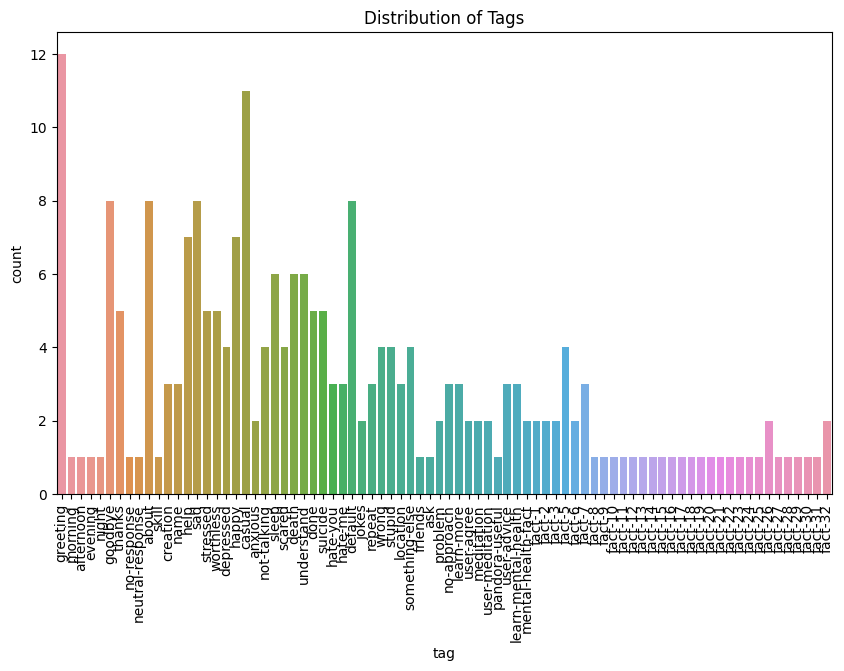

tag
greeting    12
casual      11
about        8
goodbye      8
default      8
            ..
fact-20      1
fact-21      1
fact-22      1
fact-23      1
fact-24      1
Name: count, Length: 80, dtype: int64

In [3]:
# Plot the distribution of the target variable
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.countplot(x='tag', data=df)
plt.xticks(rotation=90)
plt.title("Distribution of Tags")
plt.show()

# Show the count of each tag
df['tag'].value_counts()


# **3.2 Examine Unique Patterns**

In [4]:
# Show the number of unique patterns for each tag
df.groupby('tag')['patterns'].nunique().sort_values(ascending=False)


tag
greeting    12
casual      11
sad          8
goodbye      8
about        8
            ..
evening      1
fact-11      1
fact-12      1
fact-13      1
skill        1
Name: patterns, Length: 80, dtype: int64

# **Step 4: Data Visualization**
**4.1 Word Cloud
A word cloud can give us insight into the most frequent words in the user input.**

In [5]:
df_responses = df.explode('responses')
all_patterns = ' '.join(df['patterns'])

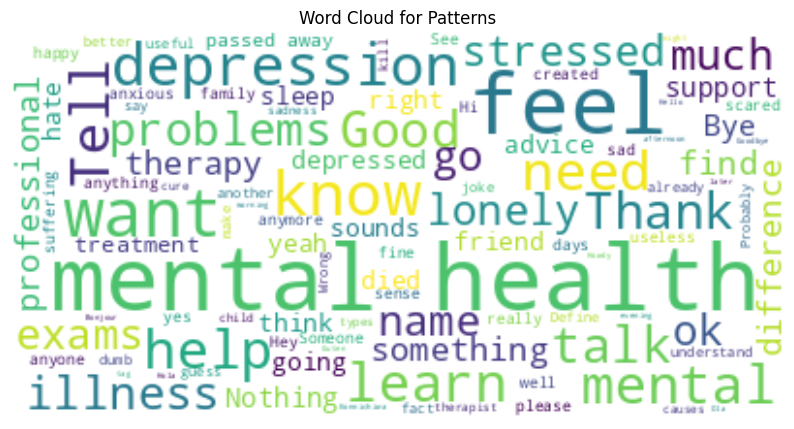

In [6]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import seaborn as sns
# Generate a word cloud image
wordcloud = WordCloud(background_color='white', max_words=100, contour_width=3, contour_color='steelblue').generate(all_patterns)

# Display the generated image:
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Do not show axes to keep it clean
plt.title('Word Cloud for Patterns')
plt.show()

# **4.2:Length of Patterns**

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


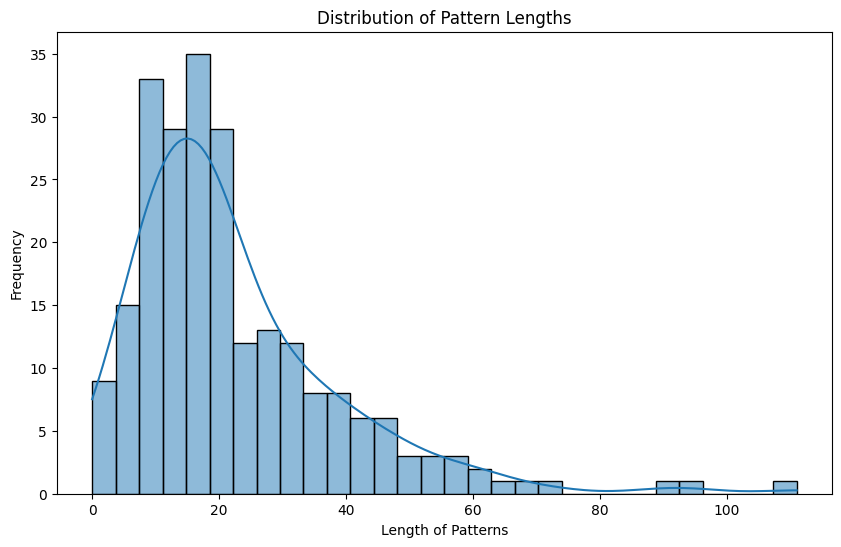

In [7]:
df['pattern_length'] = df['patterns'].apply(len)
plt.figure(figsize=(10, 6))
sns.histplot(df['pattern_length'], bins=30, kde=True)
plt.title('Distribution of Pattern Lengths')
plt.xlabel('Length of Patterns')
plt.ylabel('Frequency')
plt.show()

# **4.3 :response Length Distribution**

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


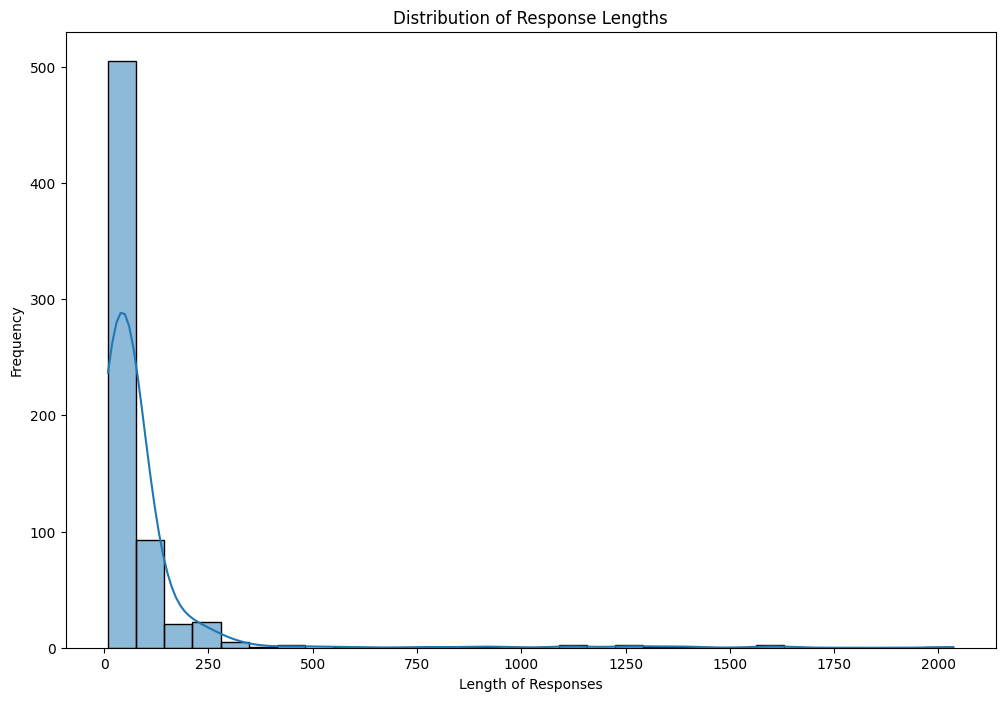

In [8]:
# Calculating response lengths from the exploded DataFrame
df_responses['response_length'] = df_responses['responses'].apply(len)
plt.figure(figsize=(12, 8))
sns.histplot(df_responses['response_length'], bins=30, kde=True)
plt.title('Distribution of Response Lengths')
plt.xlabel('Length of Responses')
plt.ylabel('Frequency')
plt.show()

# **Step 5: Preprocess**

In [9]:
import re
# Preprocessing function
def preprocess_text(s):
    s = re.sub('[^a-zA-Z\']', ' ', s)  # Keep only alphabets and apostrophes
    s = s.lower()  # Convert to lowercase
    s = s.split()  # Split into words
    s = " ".join(s)  # Rejoin words to ensure clean spacing
    return s

# Apply preprocessing to the patterns
df['patterns'] = df['patterns'].apply(preprocess_text)
df['tag'] = df['tag'].apply(preprocess_text)
df

,tag,patterns,responses,pattern_length
0,greeting,hi,[Hello there. Tell me how are you feeling toda...,2
1,greeting,hey,[Hello there. Tell me how are you feeling toda...,3
2,greeting,is anyone there,[Hello there. Tell me how are you feeling toda...,16
3,greeting,hi there,[Hello there. Tell me how are you feeling toda...,8
4,greeting,hello,[Hello there. Tell me how are you feeling toda...,5
...,...,...,...,...
227,fact,how do i know if i'm unwell,"[If your beliefs , thoughts , feelings or beha...",28
228,fact,how can i maintain social connections what if ...,"[A lot of people are alone right now, but we d...",61
229,fact,what's the difference between anxiety and stress,[Stress and anxiety are often used interchange...,49
230,fact,what's the difference between sadness and depr...,"[Sadness is a normal reaction to a loss, disap...",53


In [10]:
df['tag'].unique()


array(['greeting', 'morning', 'afternoon', 'evening', 'night', 'goodbye',
       'thanks', 'no response', 'neutral response', 'about', 'skill',
       'creation', 'name', 'help', 'sad', 'stressed', 'worthless',
       'depressed', 'happy', 'casual', 'anxious', 'not talking', 'sleep',
       'scared', 'death', 'understand', 'done', 'suicide', 'hate you',
       'hate me', 'default', 'jokes', 'repeat', 'wrong', 'stupid',
       'location', 'something else', 'friends', 'ask', 'problem',
       'no approach', 'learn more', 'user agree', 'meditation',
       'user meditation', 'pandora useful', 'user advice',
       'learn mental health', 'mental health fact', 'fact'], dtype=object)

In [11]:
X = df['patterns']
y = df['tag']

# **Step 6: Build and Train Model**


In [12]:
import torch
from torch.utils.data import DataLoader, Dataset, random_split
from transformers import BertTokenizer, BertForSequenceClassification, AdamW
from transformers import AutoModelForSequenceClassification, AutoTokenizer
from sklearn.preprocessing import LabelEncoder
import numpy as np


# Tokenization and Encoding the Data
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
max_len = 128  # Max sequence length

def encode_texts(texts, max_len):
    input_ids = []
    attention_masks = []
    
    for text in texts:
        encoded_dict = tokenizer.encode_plus(
        text,                      # Input text
        add_special_tokens=True,   # Add '[CLS]' and '[SEP]'
        max_length=max_len,        # Pad or truncate to max length
        padding='max_length',      # Use padding='max_length' instead of pad_to_max_length
        return_attention_mask=True,# Construct attn. masks
        return_tensors='pt'        # Return pytorch tensors
)

        
        
        input_ids.append(encoded_dict['input_ids'])
        attention_masks.append(encoded_dict['attention_mask'])
    
    return torch.cat(input_ids, dim=0), torch.cat(attention_masks, dim=0)

# Encoding labels
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)
num_labels = len(np.unique(y_encoded))

# Encode the patterns
input_ids, attention_masks = encode_texts(X, max_len)
labels = torch.tensor(y_encoded)

# Splitting the dataset into training and validation
dataset = torch.utils.data.TensorDataset(input_ids, attention_masks, labels)
train_size = int(0.9 * len(dataset))
val_size = len(dataset) - train_size

train_dataset, val_dataset = random_split(dataset, [train_size, val_size])

train_dataloader = DataLoader(train_dataset, shuffle=True, batch_size=16)
validation_dataloader = DataLoader(val_dataset, batch_size=16)

# Model and Optimization
model = BertForSequenceClassification.from_pretrained('bert-base-uncased', num_labels=num_labels)
optimizer = AdamW(model.parameters(), lr=2e-5)

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/usr/local/lib/python3.10/dist-packages/transformers/optimization.py:591: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


In [13]:
# Training Loop
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

epochs = 40
for epoch in range(epochs):
    model.train()
    total_train_loss = 0
    for batch in train_dataloader:
        b_input_ids, b_input_mask, b_labels = tuple(t.to(device) for t in batch)
        model.zero_grad()        
        outputs = model(b_input_ids, token_type_ids=None, attention_mask=b_input_mask, labels=b_labels)
        loss = outputs[0]
        total_train_loss += loss.item()
        loss.backward()
        optimizer.step()
    avg_train_loss = total_train_loss / len(train_dataloader)            
    print(f"Epoch {epoch+1}, Average Training Loss: {avg_train_loss:.2f}")

Epoch 1, Average Training Loss: 3.85
Epoch 2, Average Training Loss: 3.61
Epoch 3, Average Training Loss: 3.45
Epoch 4, Average Training Loss: 3.23
Epoch 5, Average Training Loss: 3.05
Epoch 6, Average Training Loss: 2.86
Epoch 7, Average Training Loss: 2.68
Epoch 8, Average Training Loss: 2.52
Epoch 9, Average Training Loss: 2.38
Epoch 10, Average Training Loss: 2.24
Epoch 11, Average Training Loss: 2.09
Epoch 12, Average Training Loss: 1.98
Epoch 13, Average Training Loss: 1.85
Epoch 14, Average Training Loss: 1.73
Epoch 15, Average Training Loss: 1.63
Epoch 16, Average Training Loss: 1.54
Epoch 17, Average Training Loss: 1.44
Epoch 18, Average Training Loss: 1.35
Epoch 19, Average Training Loss: 1.26
Epoch 20, Average Training Loss: 1.20
Epoch 21, Average Training Loss: 1.12
Epoch 22, Average Training Loss: 1.04
Epoch 23, Average Training Loss: 1.00
Epoch 24, Average Training Loss: 0.93
Epoch 25, Average Training Loss: 0.88
Epoch 26, Average Training Loss: 0.83
Epoch 27, Average Tra

# **Step 7: Predict**

In [14]:
def predict_intent(text):
    # Tokenize and encode the text for BERT
    encoded_dict = tokenizer.encode_plus(
        text,                      # Input text
        add_special_tokens=True,   # Add '[CLS]' and '[SEP]'
        max_length=max_len,        # Pad or truncate to max length
        pad_to_max_length=True,    # Pad to max length
        return_attention_mask=True,# Construct attention masks
        return_tensors='pt',       # Return PyTorch tensors
    )
    
    # Extract input IDs and attention masks from the encoded representation
    input_ids = encoded_dict['input_ids'].to(device)
    attention_mask = encoded_dict['attention_mask'].to(device)

    # No gradient calculation needed for inference
    with torch.no_grad():
        # Forward pass, calculate logit predictions
        outputs = model(input_ids, token_type_ids=None, attention_mask=attention_mask)
    
    logits = outputs[0]

    # Move logits to CPU and apply softmax to calculate probabilities
    logits = logits.detach().cpu().numpy()
    probabilities = torch.nn.functional.softmax(torch.tensor(logits), dim=1).numpy()

    # Get the predicted label with the highest probability
    predicted_label_idx = np.argmax(probabilities, axis=1).flatten()

    # Decode the predicted label
    predicted_label = label_encoder.inverse_transform(predicted_label_idx)[0]
    
    return predicted_label, probabilities[0][predicted_label_idx]


In [15]:
def test_model():
    print("Welcome to the Response Prediction Model!")
    print("Type 'exit' to quit the program.")
    
    while True:
        # Take user input
        user_input = input("Enter your message: ")
        
        # Exit condition
        if user_input.lower() == 'exit':
            print("Exiting the program. Goodbye!")
            break
        
        # Predict intent using the trained model
        predicted_intent, probabilities = predict_intent(user_input)
        
        # Extract the highest probability from the array (it returns an array of probabilities for each intent)
        max_probability = np.max(probabilities)
        
        # Provide a simple response based on the predicted intent
        if predicted_intent in ["greeting", "thanks", "goodbye"]:
            response = f"Nice to hear from you! (Intent: {predicted_intent}, Probability: {max_probability:.2f})"
        elif predicted_intent in ["sad", "stressed", "depressed", "anxious"]:
            response = f"It seems you're feeling down. (Intent: {predicted_intent}, Probability: {max_probability:.2f})"
        elif predicted_intent == "help":
            response = f"I'm here to help you. (Intent: {predicted_intent}, Probability: {max_probability:.2f})"
        else:
            response = f"Got it. (Intent: {predicted_intent}, Probability: {max_probability:.2f})"
        
        # Output the result
        print(f"Response: {response}")

# Call the test function to start the interactive loop
test_model()


Welcome to the Response Prediction Model!
Type 'exit' to quit the program.


Enter your message:  hello


Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.
/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:2870: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  warnings.warn(


Response: Nice to hear from you! (Intent: greeting, Probability: 0.91)


Enter your message:  i feel sad


/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:2870: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  warnings.warn(


Response: It seems you're feeling down. (Intent: sad, Probability: 0.88)


Enter your message:  i want some advice


/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:2870: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  warnings.warn(


Response: Got it. (Intent: user advice, Probability: 0.36)


Enter your message:  goodbye


/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:2870: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  warnings.warn(


Response: Nice to hear from you! (Intent: goodbye, Probability: 0.85)


Enter your message:  exit


Exiting the program. Goodbye!
